In [1]:
# Run this cell to ensure that altair plots show up in the exported HTML
import altair as alt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

# EDA

### 1. Describe your dataset

The data set we will be visualizing is the medical cost data set. We have 7 columns in this dataset. 

1 age: age of the primary beneficiary

2 sex: This has the gender: female, male

3 BMI: Body mass index, providing an understanding of the body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

4 children: Number of children covered by health insurance / Number of dependents

5 smoker: Smoking

6 region: the beneficiary's residential area like northeast, southeast, southwest, northwest

7 charges: Individual medical costs billed by health insurance

### 2. Load the dataset

In [2]:
import pandas as pd
import numpy as np
medical = pd.read_csv("Medical_Cost.csv")

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


On loading the dataset and checking the info, we find we have 1338 entries where age, bmi, children and charges are numerical data and sex, smoker and region are objects

### 3. Explore the data set

In [5]:
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


On describe we have the basic statistics with count, mean and quartile information

age: Ranges from 18 to 64 \
sex: options available are male and female \
BMI: Ranges from 15.96 to 53.13 with a mean of 30.66 \
children: Ranges from 0 to 5 \
smoker: Options available are yes and no \
regions: Options available are northeast, southeast, southwest, northwest \
charges: Ranges from as low as 12110 dollars  to as high as 63770 dollar \

### 4. Initial thoughts

In [6]:
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

1 On first look, it looks like fairly clean data \
2 We do not have to do null value treatment as there are no null entries present \
3 However, without visualizations, we cannot comment if we have outliers in the data \

### 5. Wrangling

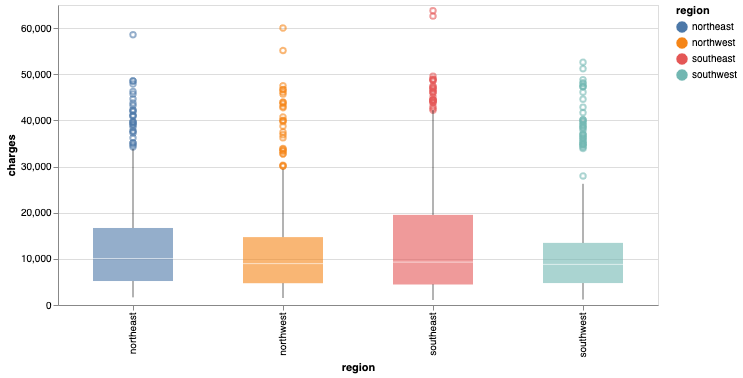

In [7]:
outlier_charges = alt.Chart(medical).mark_boxplot(size=80).encode(
    x='region',
    y='charges',
    color = 'region'
).properties(
    width=600
).configure_mark(
    opacity=0.6
)
outlier_charges

In [8]:
#Outlier treatment

Q1=medical['charges'].quantile(0.25)
Q3=medical['charges'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)
print(Lower_Whisker, Upper_Whisker)


medical1 = medical[medical['charges']< Upper_Whisker]

4740.28715
16639.912515
11899.625365
-13109.1508975 34489.350562499996


In [9]:
medical1.shape

(1199, 7)

For this project, we will ignore the outliers in BMI

### 6 Research Questions (Part1)

##### Research Question 1: Is there a correlation between BMI and Charges? 

### 7 Data analysis & visualization (Part1)

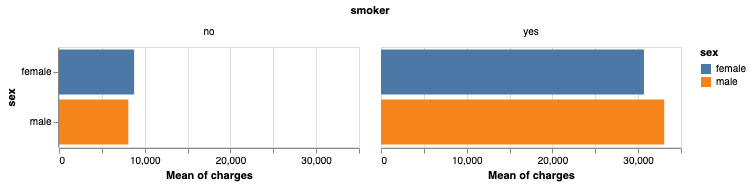

In [10]:
bar1 = alt.Chart(medical).mark_bar().encode(
    x='mean(charges)',
    y='sex',
color = 'sex').properties(width=300, height=100
).facet("smoker")

bar1

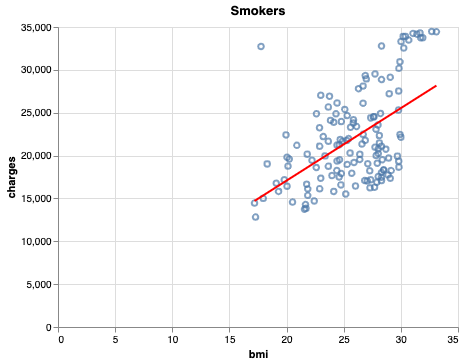

In [11]:
smoker_medical = medical1[medical1['smoker'] == 'yes']

scatter1 = alt.Chart(smoker_medical, title='Smokers').mark_point().encode(
    x=alt.X('bmi'),
    y=alt.Y('charges')
)

scatter1+scatter1.transform_regression('bmi', 'charges', method="linear").mark_line(color = 'red')

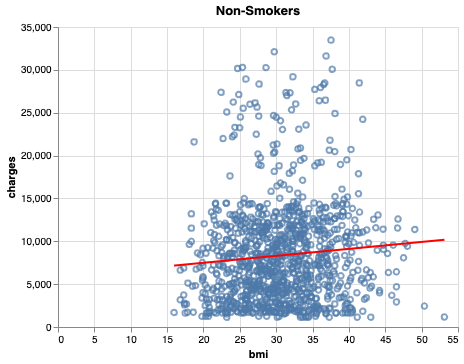

In [12]:
nonsmoker_medical = medical1[medical1['smoker'] == 'no']

scatter1 = alt.Chart(nonsmoker_medical, title='Non-Smokers').mark_point().encode(
    x=alt.X('bmi'),
    y=alt.Y('charges')
)

scatter1+scatter1.transform_regression('bmi', 'charges', method="linear").mark_line(color = 'red')

Based on the visualization, we can see that the slope of the regression line of smokers is more steeper than the slope of the non-smokers. With the current scenario, it looks like smokers tend to pay more than non-smokers. However, we have limited data points. To be able to confirm this, we will require additional data and data processing method or wrangling that is outside the scope of this mini-project.

### 6 Research Questions (Part2)

#### Research Question 2: Does age of smokers have any impact on medical charges?

### 7 Data analysis & visualization (Part2)

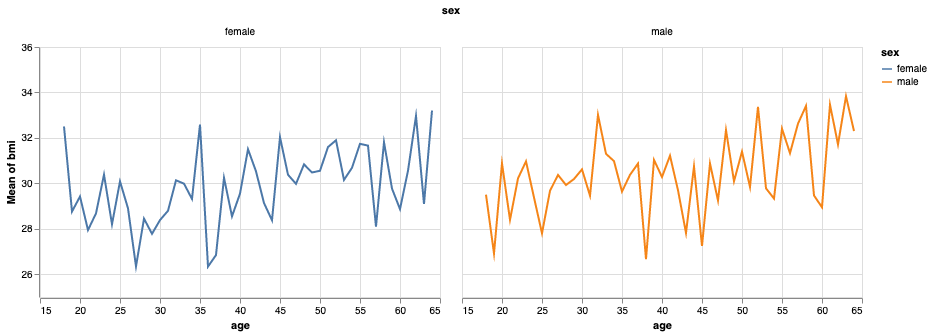

In [13]:
line2 = alt.Chart(medical1).mark_line().encode(
    x=alt.X('age'),
    y=alt.Y('mean(bmi)',scale=alt.Scale(domain=[25, 36])),
    color = 'sex'
).properties(width=400, height=250
).facet('sex')
line2

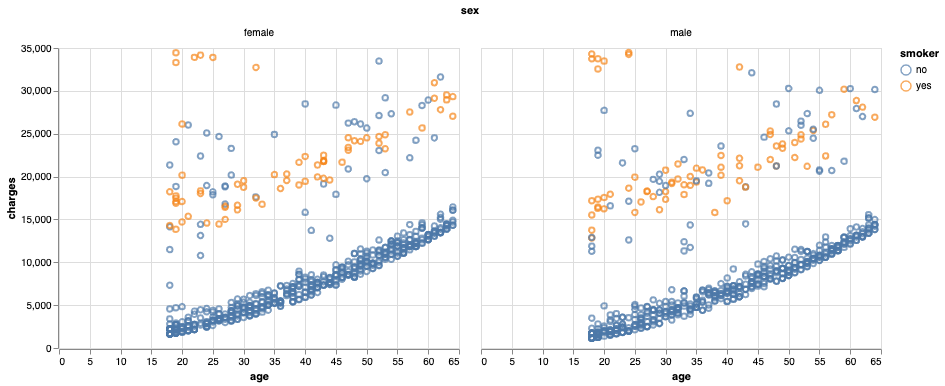

In [14]:
scatter2 = alt.Chart(medical1).mark_point().encode(
    x=alt.X('age'),
    y='charges',
    color = "smoker"
).facet('sex')

scatter2

It seems like higher charges are associated with smokers of older age. Perhaps the older the smoker gets, the more complicated his health conditions which results in higher charges. We can also see a small cluster of smokers between the age 18 to 26 paying higher charges

However, with this limited data set, it is difficult to prove this insight. To be able to confirm this, we will require additional data and data processing method or wrangling that is outside the scope of this mini-project. 

### 8 Summary and Conclusion

With the help of visualizations, we can gather the following research question. 

1 Is there a correlation between BMI and Charges?  We cannot be sure 
2 Is Does the age of smokers have any impact on medical charges? We cannot be sure 

To confirm the answers, we need additional data entries and that is outside the scope of this mini-project 